In [22]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import json
import io
import seaborn as sns
import base64
from PIL import Image
from io import BytesIO
import base64

%matplotlib inline

## Helper Functions

In [9]:
def view_samples_and_metadata(samples, df_sample):

    for key in samples.keys():
        display(samples[key])
        print(df_sample.loc[df_sample['id'] == key].to_dict())
        
        
def data_histograms(df):
    fig, axs = plt.subplots(3, 3, figsize=(20, 18))
    sns.histplot(data=df, x="articleType", kde=True, ax=axs[0, 0])
    g = sns.histplot(data=df, x="baseColour", kde=True,  ax=axs[0, 1])
    g.set_xticklabels(labels=list(df['baseColour']) ,rotation=90)
    sns.histplot(data=df, x="gender", kde=True,  ax=axs[0, 2])
    sns.histplot(data=df, x="masterCategory", kde=True, ax=axs[1, 0])
    sns.histplot(data=df, x="season", kde=True,  ax=axs[1, 1])
    sns.histplot(data=df, x="subCategory", kde=True,  ax=axs[1, 2])
    sns.histplot(data=df, x="usage", kde=True, ax=axs[2, 0])
    sns.histplot(data=df, x="year", kde=True, ax=axs[2, 1])
    plt.show()


def _bytes_to_image(sample_images):
    samples_copy = sample_images.copy()
    
    for key in sample_images.keys():
        samples_copy[key] = Image.open(BytesIO(base64.b64decode(sample_images[key].encode())))
    
    return samples_copy

def process_response(resp):
    df = {}
    df_sample = {}
    sample_images = {}
    
    strfy = resp.content.decode('utf-8')
    data = json.loads(strfy)
    df = pd.DataFrame.from_dict(data['Results'])
    df_sample = pd.DataFrame.from_dict(data['Samples_Results'])
    if data['Samples']:
        sample_images = json.loads(data['Samples'])
        sample_images = _bytes_to_image(sample_images)
    
    return df, df_sample, sample_images

# Examples using the Flask server

## 1. Query to get some data

### 1.1 First Example

In [4]:
data = {"query": "SELECT * FROM database WHERE year > 2012 AND gender = 'Men' AND subCategory = 'Shoes'",
        "display": True,
        "n_images": 10,
        "bucket_name": "test-bucket",
        "augment": False
       }

resp = requests.get(f'http://localhost:5050/query', json=data)

In [5]:
if resp.status_code == 200: 
    df, df_sample, sample_images = process_response(resp)
    df.head()

In [6]:
df_sample.head()

,articleType,baseColour,gender,id,masterCategory,productDisplayName,season,subCategory,usage,year
111,Casual Shoes,Brown,Men,44437,Footwear,Gliders Men Brown Shoes,Summer,Shoes,Casual,2013.0
451,Formal Shoes,Brown,Men,50726,Footwear,Red Chief Men Brown Formal Shoes,Winter,Shoes,Formal,2018.0
488,Formal Shoes,Black,Men,46796,Footwear,Arrow Men Black Formal Shoes,Summer,Shoes,Formal,2013.0
512,Casual Shoes,Brown,Men,34540,Footwear,Red Tape Men Brown Shoes,Winter,Shoes,Casual,2018.0
565,Formal Shoes,Black,Men,8236,Footwear,Red Tape Men Black Formal Shoe,Winter,Shoes,Formal,2018.0


C:\Users\andre.castro\Anaconda3\envs\ml-pipeline\lib\site-packages\ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':
C:\Users\andre.castro\Anaconda3\envs\ml-pipeline\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre.castro\Anaconda3\envs\ml-pipeline\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre.castro\Anaconda3\envs\ml-pipeline\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


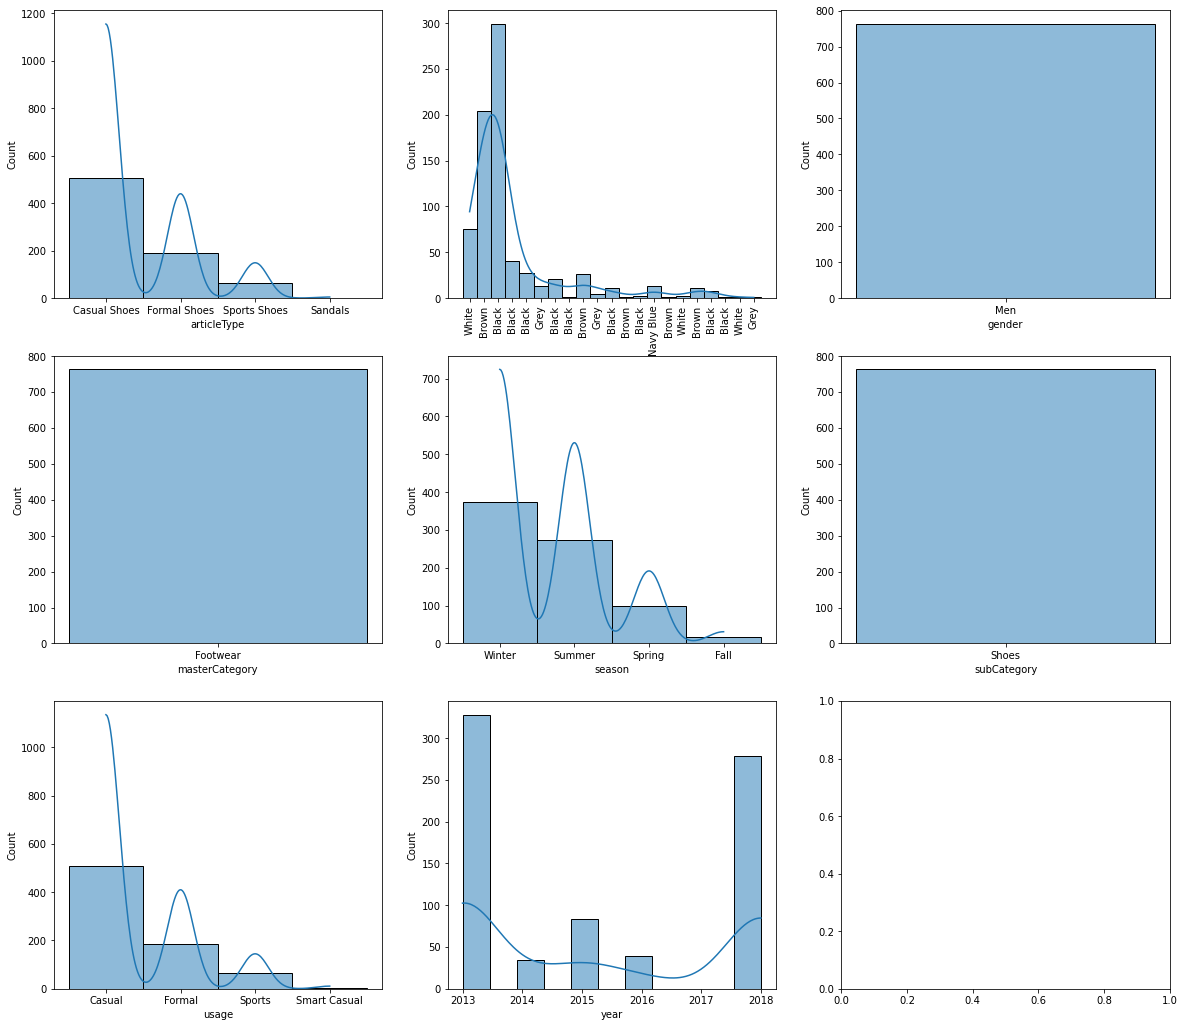

In [7]:
data_histograms(df)

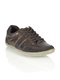

{'articleType': {}, 'baseColour': {}, 'gender': {}, 'id': {}, 'masterCategory': {}, 'productDisplayName': {}, 'season': {}, 'subCategory': {}, 'usage': {}, 'year': {}}


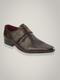

{'articleType': {}, 'baseColour': {}, 'gender': {}, 'id': {}, 'masterCategory': {}, 'productDisplayName': {}, 'season': {}, 'subCategory': {}, 'usage': {}, 'year': {}}


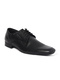

{'articleType': {}, 'baseColour': {}, 'gender': {}, 'id': {}, 'masterCategory': {}, 'productDisplayName': {}, 'season': {}, 'subCategory': {}, 'usage': {}, 'year': {}}


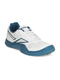

{'articleType': {}, 'baseColour': {}, 'gender': {}, 'id': {}, 'masterCategory': {}, 'productDisplayName': {}, 'season': {}, 'subCategory': {}, 'usage': {}, 'year': {}}


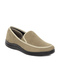

{'articleType': {}, 'baseColour': {}, 'gender': {}, 'id': {}, 'masterCategory': {}, 'productDisplayName': {}, 'season': {}, 'subCategory': {}, 'usage': {}, 'year': {}}


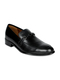

{'articleType': {}, 'baseColour': {}, 'gender': {}, 'id': {}, 'masterCategory': {}, 'productDisplayName': {}, 'season': {}, 'subCategory': {}, 'usage': {}, 'year': {}}


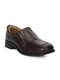

{'articleType': {}, 'baseColour': {}, 'gender': {}, 'id': {}, 'masterCategory': {}, 'productDisplayName': {}, 'season': {}, 'subCategory': {}, 'usage': {}, 'year': {}}


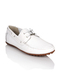

{'articleType': {}, 'baseColour': {}, 'gender': {}, 'id': {}, 'masterCategory': {}, 'productDisplayName': {}, 'season': {}, 'subCategory': {}, 'usage': {}, 'year': {}}


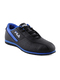

{'articleType': {}, 'baseColour': {}, 'gender': {}, 'id': {}, 'masterCategory': {}, 'productDisplayName': {}, 'season': {}, 'subCategory': {}, 'usage': {}, 'year': {}}


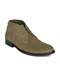

{'articleType': {}, 'baseColour': {}, 'gender': {}, 'id': {}, 'masterCategory': {}, 'productDisplayName': {}, 'season': {}, 'subCategory': {}, 'usage': {}, 'year': {}}


In [8]:
view_samples_and_metadata(sample_images, df_sample)

### 1.2 Second Example

In [9]:
data = {"query": "SELECT * FROM database WHERE year > 2012 AND gender = 'Women' AND subCategory = 'Watches'",
        "display": True,
        "n_images": 10,
        "bucket_name": "test-bucket",
        "augment": False
       }

resp = requests.get(f'http://localhost:5050/query', json=data)
df, df_sample, sample_images = process_response(resp)

C:\Users\andre.castro\Anaconda3\envs\ml-pipeline\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre.castro\Anaconda3\envs\ml-pipeline\lib\site-packages\ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':
C:\Users\andre.castro\Anaconda3\envs\ml-pipeline\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre.castro\Anaconda3\envs\ml-pipeline\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre.castro\Anaconda3\envs\ml-pipeline\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


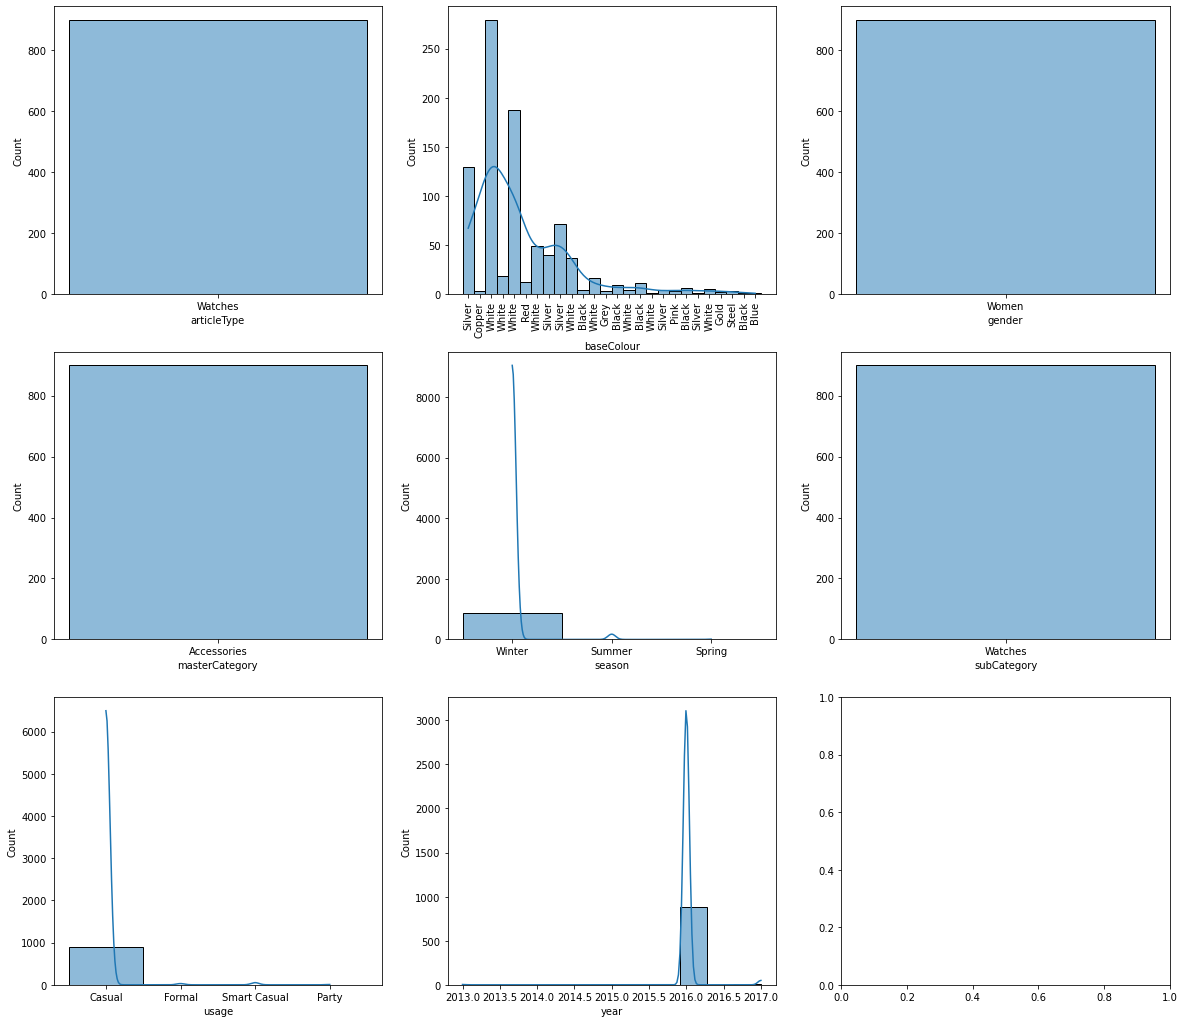

In [10]:
data_histograms(df)

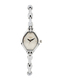

{'articleType': {}, 'baseColour': {}, 'gender': {}, 'id': {}, 'masterCategory': {}, 'productDisplayName': {}, 'season': {}, 'subCategory': {}, 'usage': {}, 'year': {}}


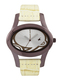

{'articleType': {}, 'baseColour': {}, 'gender': {}, 'id': {}, 'masterCategory': {}, 'productDisplayName': {}, 'season': {}, 'subCategory': {}, 'usage': {}, 'year': {}}


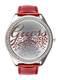

{'articleType': {}, 'baseColour': {}, 'gender': {}, 'id': {}, 'masterCategory': {}, 'productDisplayName': {}, 'season': {}, 'subCategory': {}, 'usage': {}, 'year': {}}


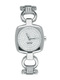

{'articleType': {}, 'baseColour': {}, 'gender': {}, 'id': {}, 'masterCategory': {}, 'productDisplayName': {}, 'season': {}, 'subCategory': {}, 'usage': {}, 'year': {}}


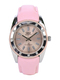

{'articleType': {}, 'baseColour': {}, 'gender': {}, 'id': {}, 'masterCategory': {}, 'productDisplayName': {}, 'season': {}, 'subCategory': {}, 'usage': {}, 'year': {}}


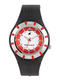

{'articleType': {}, 'baseColour': {}, 'gender': {}, 'id': {}, 'masterCategory': {}, 'productDisplayName': {}, 'season': {}, 'subCategory': {}, 'usage': {}, 'year': {}}


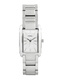

{'articleType': {}, 'baseColour': {}, 'gender': {}, 'id': {}, 'masterCategory': {}, 'productDisplayName': {}, 'season': {}, 'subCategory': {}, 'usage': {}, 'year': {}}


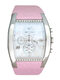

{'articleType': {}, 'baseColour': {}, 'gender': {}, 'id': {}, 'masterCategory': {}, 'productDisplayName': {}, 'season': {}, 'subCategory': {}, 'usage': {}, 'year': {}}


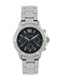

{'articleType': {}, 'baseColour': {}, 'gender': {}, 'id': {}, 'masterCategory': {}, 'productDisplayName': {}, 'season': {}, 'subCategory': {}, 'usage': {}, 'year': {}}


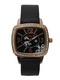

{'articleType': {}, 'baseColour': {}, 'gender': {}, 'id': {}, 'masterCategory': {}, 'productDisplayName': {}, 'season': {}, 'subCategory': {}, 'usage': {}, 'year': {}}


In [11]:
view_samples_and_metadata(sample_images, df_sample)

### 1.3 Third Example

In [12]:
data = {"query": "SELECT * FROM database WHERE year > 2011 AND gender = 'Men' AND subCategory = 'Topwear'",
        "display": True,
        "n_images": 10,
        "bucket_name": "test-bucket",
        "augment": False
       }

resp = requests.get(f'http://localhost:5050/query', json=data)

In [13]:
if resp.status_code == 200: 
    df, df_sample, sample_images = process_response(resp)
else:
    print("Bad request, try another query")

In [14]:
df.head()

,articleType,baseColour,gender,id,masterCategory,productDisplayName,season,subCategory,usage,year
0,Tshirts,Grey,Men,53759,Apparel,Puma Men Grey T-shirt,Summer,Topwear,Casual,2012.0
1,Shirts,Green,Men,30805,Apparel,Fabindia Men Striped Green Shirt,Summer,Topwear,Ethnic,2012.0
2,Shirts,Navy Blue,Men,37812,Apparel,John Players Men Navy Blue Shirt,Summer,Topwear,Formal,2012.0
3,Shirts,Brown,Men,56825,Apparel,John Players Men Brown Shirt,Summer,Topwear,Casual,2012.0
4,Tshirts,Black,Men,29584,Apparel,Indigo Nation Men Printed Black T-shirt,Summer,Topwear,Casual,2012.0


In [15]:
df_sample.head()

,articleType,baseColour,gender,id,masterCategory,productDisplayName,season,subCategory,usage,year
28,Tshirts,Navy Blue,Men,29548,Apparel,Classic Polo Men Printed Navy Blue T-shirt,Summer,Topwear,Casual,2012.0
418,Tshirts,Red,Men,32428,Apparel,ADIDAS Men Red Jersey,Summer,Topwear,Sports,2012.0
649,Tshirts,Off White,Men,30346,Apparel,Myntra Men Peace-War Off White T-shirt,Summer,Topwear,Casual,2012.0
2082,Tshirts,White,Men,40081,Apparel,ADIDAS Men White & Green T-shirt,Summer,Topwear,Sports,2012.0
2240,Tshirts,Black,Men,17914,Apparel,Nike Mens Polo Black T-shirt,Spring,Topwear,Casual,2013.0


C:\Users\andre.castro\Anaconda3\envs\ml-pipeline\lib\site-packages\ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':
C:\Users\andre.castro\Anaconda3\envs\ml-pipeline\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre.castro\Anaconda3\envs\ml-pipeline\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre.castro\Anaconda3\envs\ml-pipeline\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


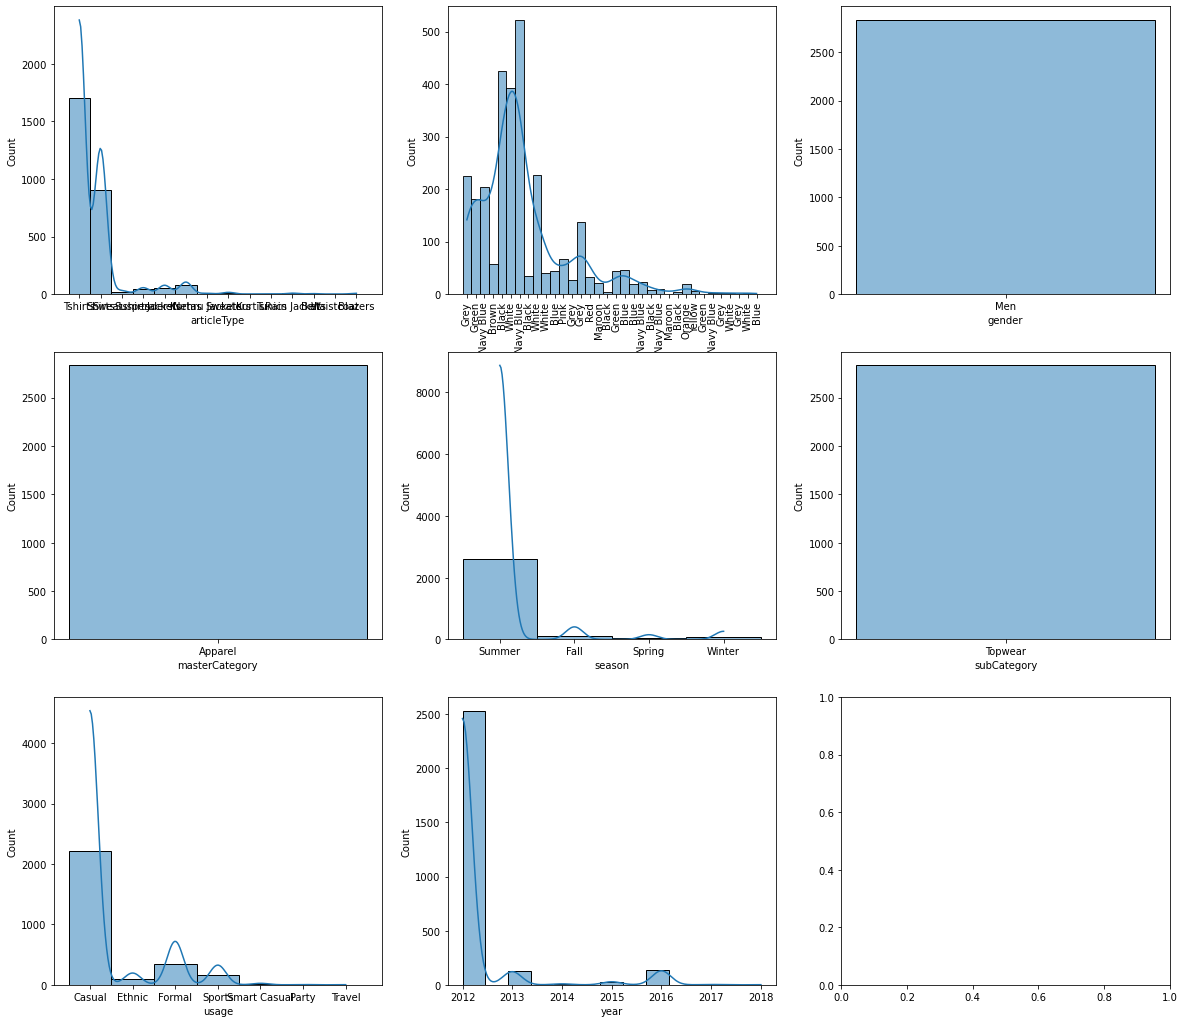

In [16]:
data_histograms(df)

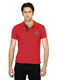

{'articleType': {}, 'baseColour': {}, 'gender': {}, 'id': {}, 'masterCategory': {}, 'productDisplayName': {}, 'season': {}, 'subCategory': {}, 'usage': {}, 'year': {}}


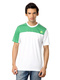

{'articleType': {}, 'baseColour': {}, 'gender': {}, 'id': {}, 'masterCategory': {}, 'productDisplayName': {}, 'season': {}, 'subCategory': {}, 'usage': {}, 'year': {}}


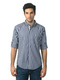

{'articleType': {}, 'baseColour': {}, 'gender': {}, 'id': {}, 'masterCategory': {}, 'productDisplayName': {}, 'season': {}, 'subCategory': {}, 'usage': {}, 'year': {}}


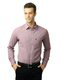

{'articleType': {}, 'baseColour': {}, 'gender': {}, 'id': {}, 'masterCategory': {}, 'productDisplayName': {}, 'season': {}, 'subCategory': {}, 'usage': {}, 'year': {}}


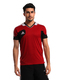

{'articleType': {}, 'baseColour': {}, 'gender': {}, 'id': {}, 'masterCategory': {}, 'productDisplayName': {}, 'season': {}, 'subCategory': {}, 'usage': {}, 'year': {}}


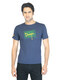

{'articleType': {}, 'baseColour': {}, 'gender': {}, 'id': {}, 'masterCategory': {}, 'productDisplayName': {}, 'season': {}, 'subCategory': {}, 'usage': {}, 'year': {}}


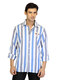

{'articleType': {}, 'baseColour': {}, 'gender': {}, 'id': {}, 'masterCategory': {}, 'productDisplayName': {}, 'season': {}, 'subCategory': {}, 'usage': {}, 'year': {}}


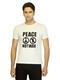

{'articleType': {}, 'baseColour': {}, 'gender': {}, 'id': {}, 'masterCategory': {}, 'productDisplayName': {}, 'season': {}, 'subCategory': {}, 'usage': {}, 'year': {}}


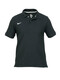

{'articleType': {}, 'baseColour': {}, 'gender': {}, 'id': {}, 'masterCategory': {}, 'productDisplayName': {}, 'season': {}, 'subCategory': {}, 'usage': {}, 'year': {}}


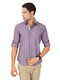

{'articleType': {}, 'baseColour': {}, 'gender': {}, 'id': {}, 'masterCategory': {}, 'productDisplayName': {}, 'season': {}, 'subCategory': {}, 'usage': {}, 'year': {}}


In [17]:
view_samples_and_metadata(sample_images, df_sample)

## 2. Query and Transform

In [18]:
data = {"query": "SELECT * FROM database WHERE year > 2012 AND gender = 'Women' AND subCategory = 'Watches'",
        "display": True,
        "n_images": 10,
        "bucket_name": "test-bucket",
        "augment": True,
       }

resp = requests.get(f'http://localhost:5050/query', json=data)

In [19]:
df, df_sample, sample_images = process_response(resp)

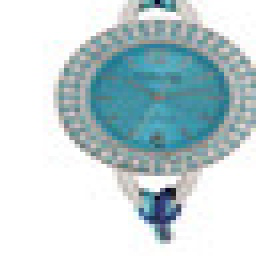

{'articleType': {}, 'baseColour': {}, 'gender': {}, 'id': {}, 'masterCategory': {}, 'productDisplayName': {}, 'season': {}, 'subCategory': {}, 'usage': {}, 'year': {}}


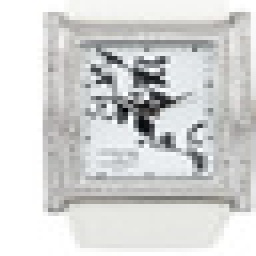

{'articleType': {}, 'baseColour': {}, 'gender': {}, 'id': {}, 'masterCategory': {}, 'productDisplayName': {}, 'season': {}, 'subCategory': {}, 'usage': {}, 'year': {}}


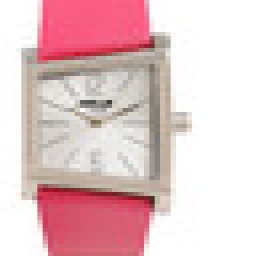

{'articleType': {}, 'baseColour': {}, 'gender': {}, 'id': {}, 'masterCategory': {}, 'productDisplayName': {}, 'season': {}, 'subCategory': {}, 'usage': {}, 'year': {}}


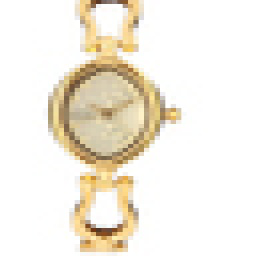

{'articleType': {}, 'baseColour': {}, 'gender': {}, 'id': {}, 'masterCategory': {}, 'productDisplayName': {}, 'season': {}, 'subCategory': {}, 'usage': {}, 'year': {}}


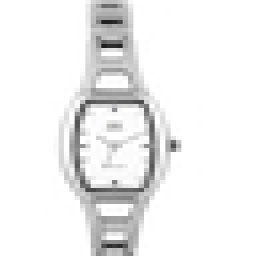

{'articleType': {}, 'baseColour': {}, 'gender': {}, 'id': {}, 'masterCategory': {}, 'productDisplayName': {}, 'season': {}, 'subCategory': {}, 'usage': {}, 'year': {}}


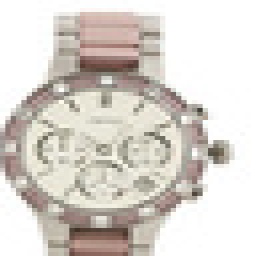

{'articleType': {}, 'baseColour': {}, 'gender': {}, 'id': {}, 'masterCategory': {}, 'productDisplayName': {}, 'season': {}, 'subCategory': {}, 'usage': {}, 'year': {}}


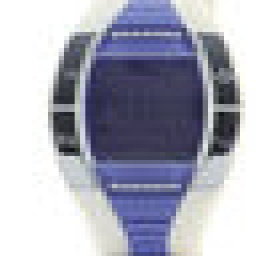

{'articleType': {}, 'baseColour': {}, 'gender': {}, 'id': {}, 'masterCategory': {}, 'productDisplayName': {}, 'season': {}, 'subCategory': {}, 'usage': {}, 'year': {}}


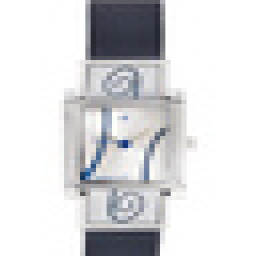

{'articleType': {}, 'baseColour': {}, 'gender': {}, 'id': {}, 'masterCategory': {}, 'productDisplayName': {}, 'season': {}, 'subCategory': {}, 'usage': {}, 'year': {}}


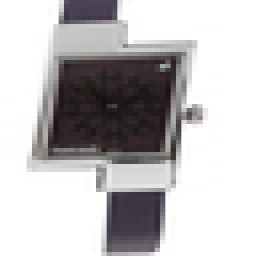

{'articleType': {}, 'baseColour': {}, 'gender': {}, 'id': {}, 'masterCategory': {}, 'productDisplayName': {}, 'season': {}, 'subCategory': {}, 'usage': {}, 'year': {}}


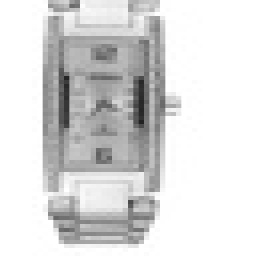

{'articleType': {}, 'baseColour': {}, 'gender': {}, 'id': {}, 'masterCategory': {}, 'productDisplayName': {}, 'season': {}, 'subCategory': {}, 'usage': {}, 'year': {}}


In [20]:
view_samples_and_metadata(sample_images, df_sample)

## 3. Query and perform inference

In [4]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [5]:
from server import utils

In [77]:
data = {"query": "SELECT * FROM database WHERE year > 2011 AND gender = 'Men' AND subCategory = 'Topwear'",
        "display": True,
        "n_images": 10,
        "bucket_name": "test-bucket",
        "augment": False
       }

resp = requests.get(f'http://localhost:5050/query', json=data)

In [78]:
df, df_sample, sample_images = process_response(resp)

In [79]:
sample_images

{'37155': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80 at 0x2009405D148>,
 '27645': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80 at 0x2009405D708>,
 '31260': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80 at 0x2009405D948>,
 '59300': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80 at 0x2009405DB48>,
 '30317': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80 at 0x2009405DD08>,
 '37718': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80 at 0x2009405DDC8>,
 '34331': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80 at 0x2009405DE88>,
 '58724': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80 at 0x20094061088>,
 '29322': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80 at 0x20094061288>,
 '33057': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80 at 0x20094061488>}

In [80]:
def pil_to_base64_str(img):
    buffered = BytesIO()
    img.save(buffered, format="JPEG")
    buffered.seek(0)
    img_byte = buffered.getvalue()
    b64_bytes = base64.b64encode(img_byte)
    b64_string = b64_bytes.decode()
    return b64_string

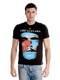

In [82]:
display(sample_images['27645'])

In [83]:
image = pil_to_base64_str(sample_images['27645'])

In [93]:
data = {"image": image}

resp = requests.get(f'http://localhost:5050/predict', json=data)

In [94]:
strfy = resp.content.decode('utf-8')
data = json.loads(strfy)
data

{'Prediction': 37, 'Status': 'ok'}